<a href="https://colab.research.google.com/github/yuktiverma43/Data-Science-Projects/blob/main/Git_Hub_Easy_Visa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Easy Visa Project**

Context:
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

Objective:
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.
Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

case_id: ID of each visa application
continent: Information of continent the employee
education_of_employee: Information of education of the employee
has_job_experience: Does the employee has any job experience? Y= Yes; N = No
requires_job_training: Does the employee require any job training? Y = Yes; N = No
no_of_employees: Number of employees in the employer's company
yr_of_estab: Year in which the employer's company was established
region_of_employment: Information of foreign worker's intended region of employment in the US.
prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
case_status: Flag indicating if the Visa was certified or denied

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

**Data Overview**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EasyVisa.csv')

In [ ]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [ ]:
data.shape

(25480, 12)

Observation:

There are 25480 rows and 12 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Observation:

The data type of no_of_employees, yr_of_estab is int and the data type of prevailing_wage is float while the data type of other columns is object.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [ ]:
data.describe(include='object').T

,count,unique,top,freq
case_id,25480,25480,EZYV25480,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [ ]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
data.duplicated().sum()

np.int64(0)

Observation:

There is no duplicate value present in data set.

Exploratory Data Analysis (EDA)


In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
data.case_id.nunique()

25480

In [ ]:
data=data.drop('case_id',axis=1)

Observation:

This is unique column, therefore, we will drop this column.

In [ ]:
data.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

unique_id is dropped.

In [ ]:
col_object=data.select_dtypes(include='object').columns
for i in col_object:
  print(data[i].value_counts())
  print("*"*50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
**************************************************
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
**************************************************
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
**************************************************
full_time_posit

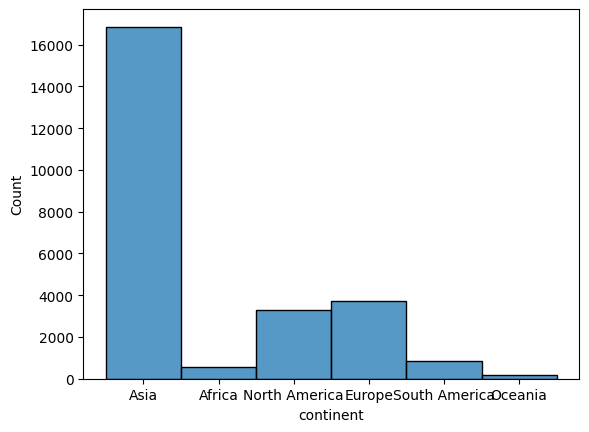

In [ ]:
sns.histplot(data, x='continent');

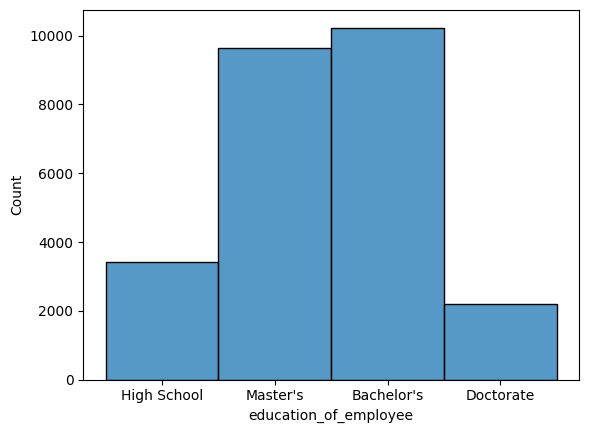

In [ ]:
sns.histplot(data, x='education_of_employee');

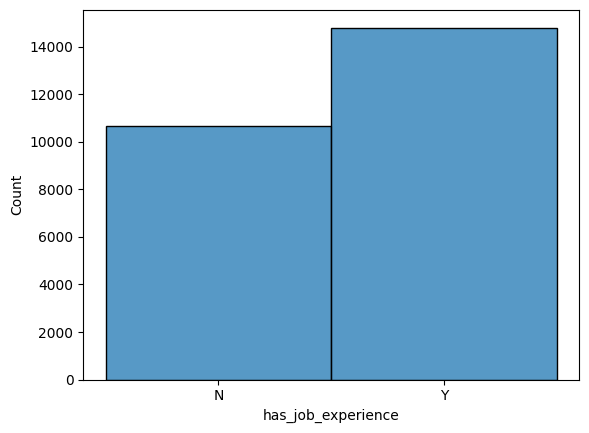

In [ ]:
sns.histplot(data,x='has_job_experience');

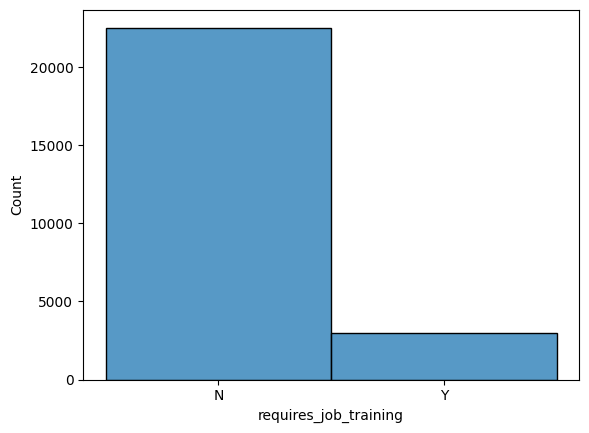

In [ ]:
sns.histplot(data,x='requires_job_training');

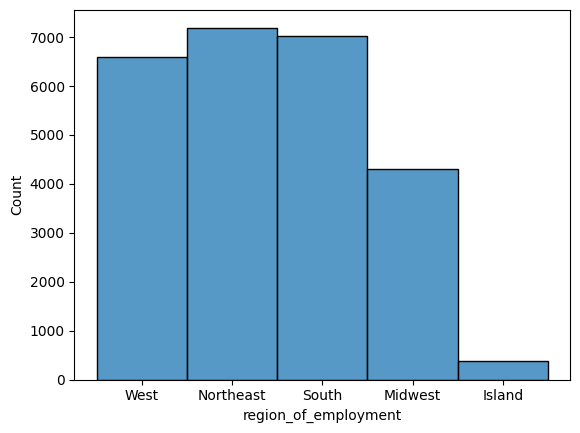

In [ ]:
sns.histplot(data,x='region_of_employment');

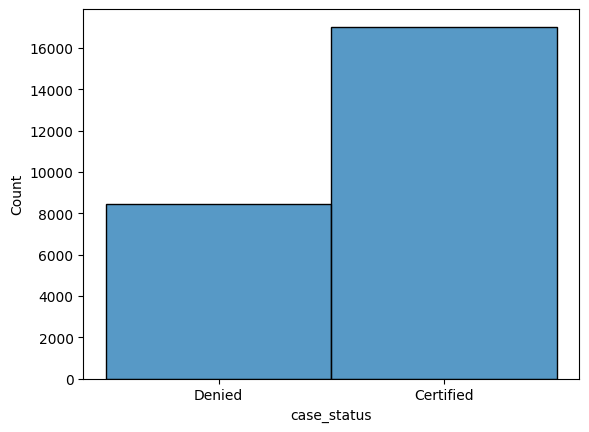

In [ ]:
sns.histplot(data,x='case_status');

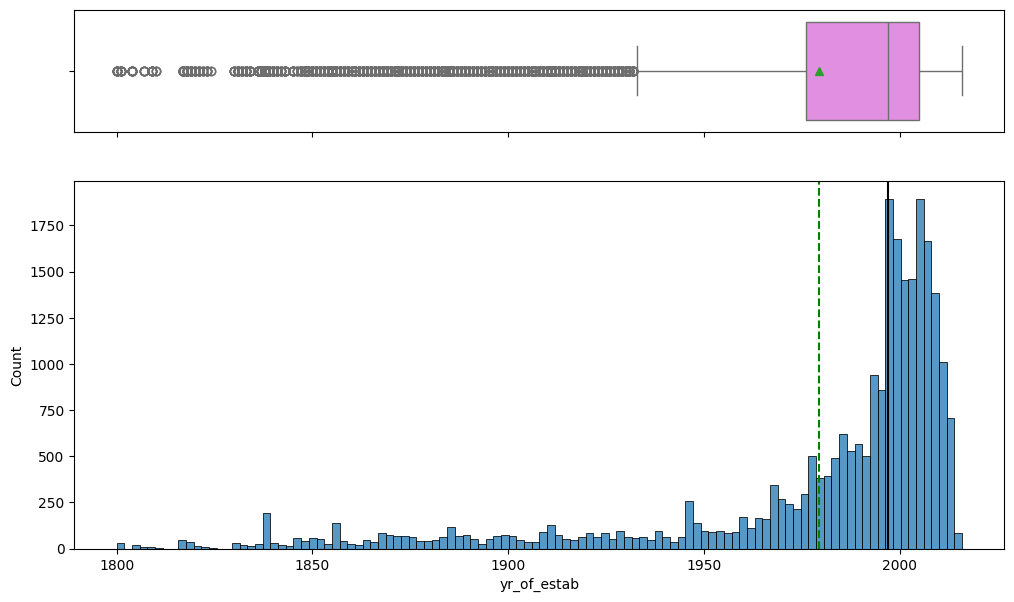

In [ ]:
histogram_boxplot(data,'yr_of_estab')

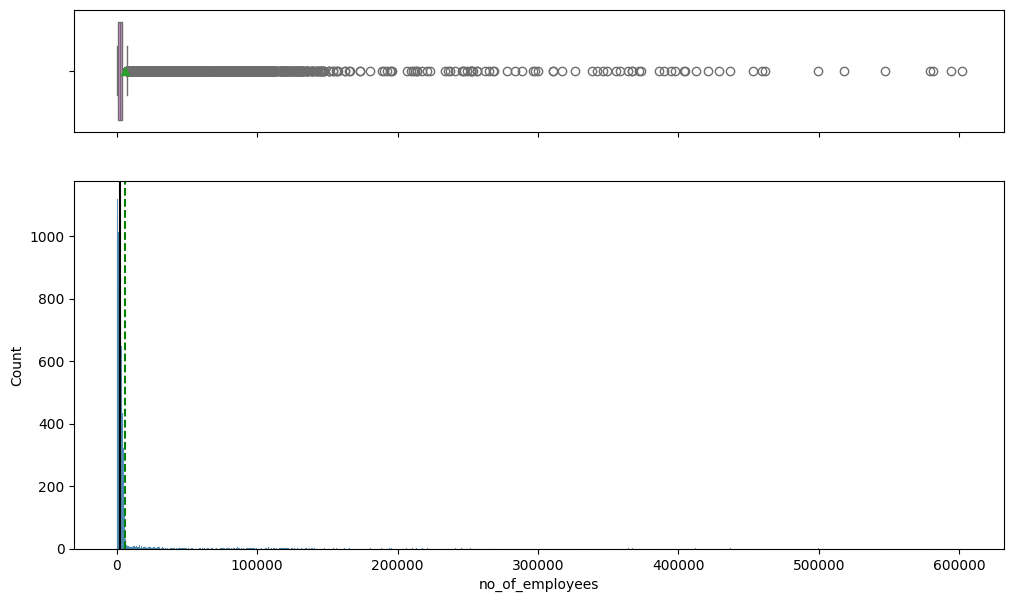

In [ ]:
histogram_boxplot(data,'no_of_employees')

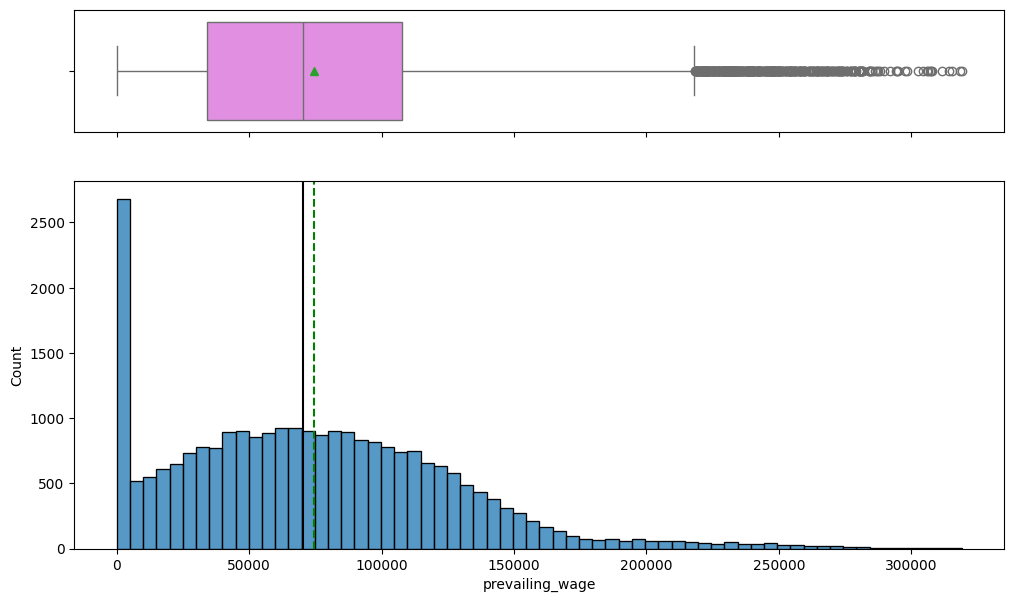

In [ ]:
histogram_boxplot(data,'prevailing_wage')

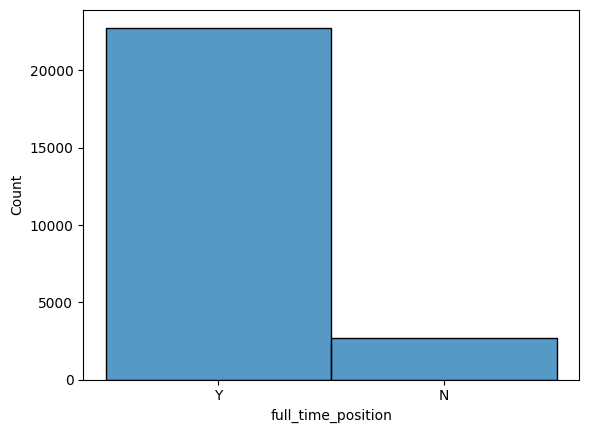

In [ ]:
sns.histplot(data,x='full_time_position');

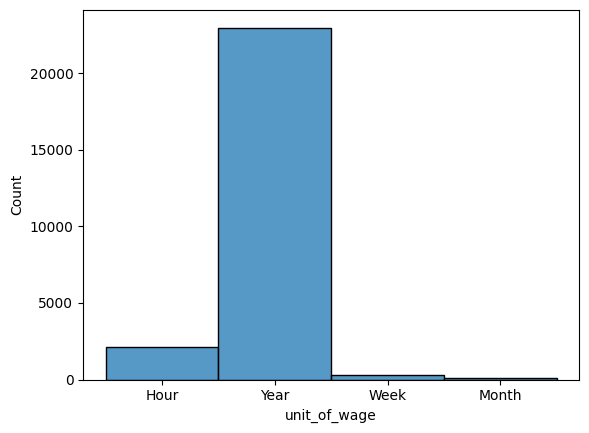

In [ ]:
sns.histplot(data, x='unit_of_wage');

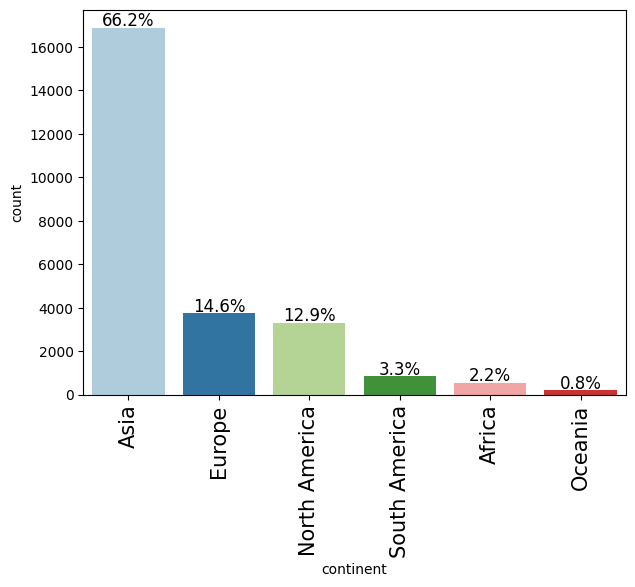

In [ ]:
labeled_barplot(data,'continent', perc=True)

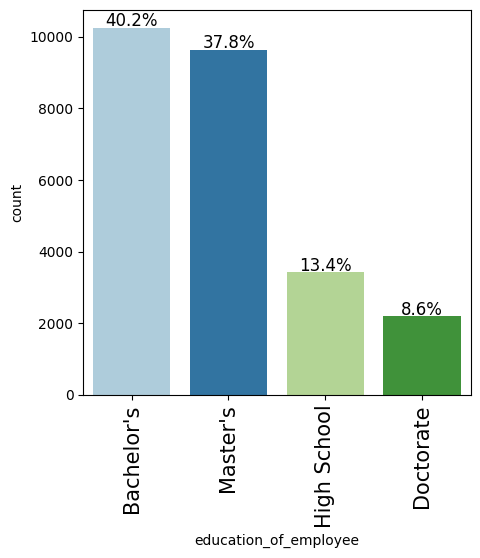

In [ ]:
labeled_barplot(data,'education_of_employee', perc=True)

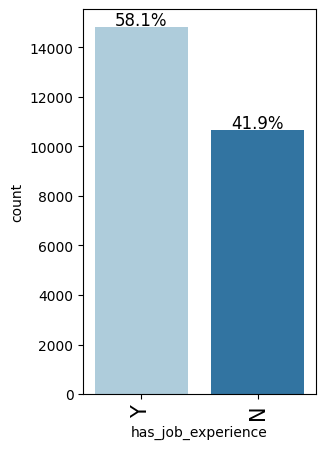

In [ ]:
labeled_barplot(data,'has_job_experience', perc=True)

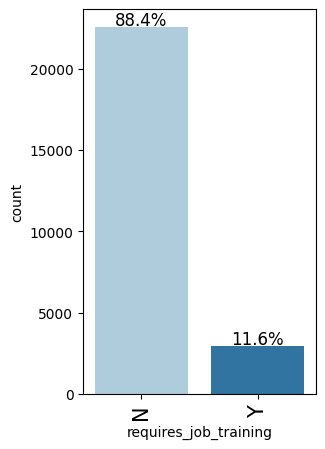

In [ ]:
labeled_barplot(data,'requires_job_training', perc=True)

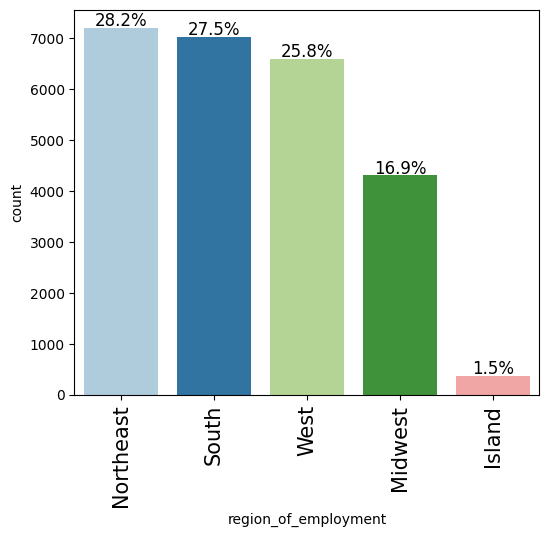

In [ ]:
labeled_barplot(data,'region_of_employment', perc=True)

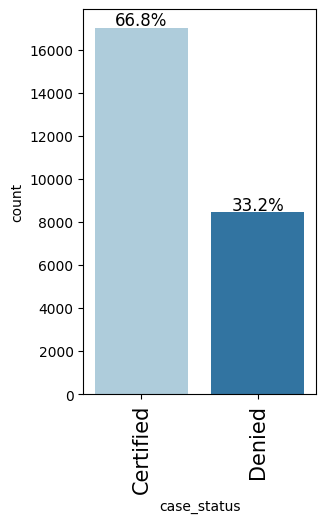

In [ ]:
labeled_barplot(data,'case_status', perc=True)

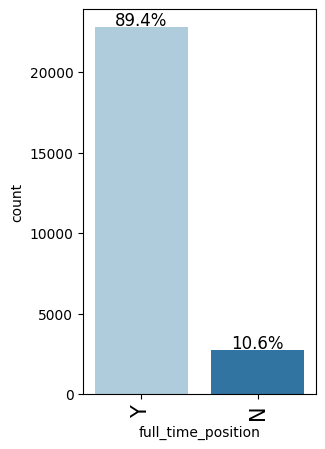

In [ ]:
labeled_barplot(data,'full_time_position', perc=True)

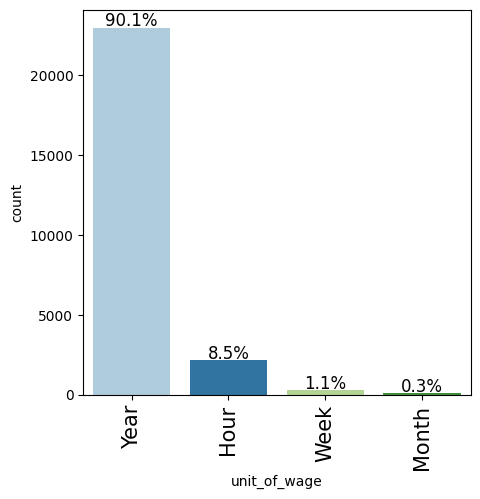

In [ ]:
labeled_barplot(data,'unit_of_wage', perc=True)

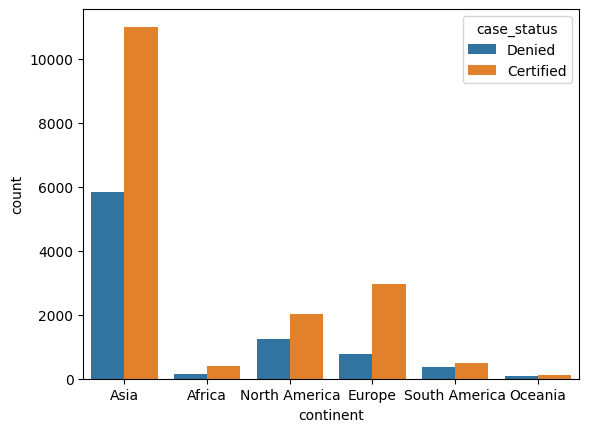

In [ ]:
sns.countplot(data=data, x='continent', hue='case_status');

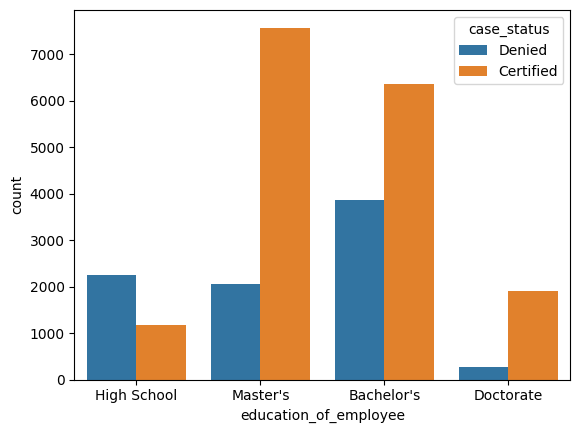

In [ ]:
sns.countplot(data=data, x='education_of_employee', hue='case_status');

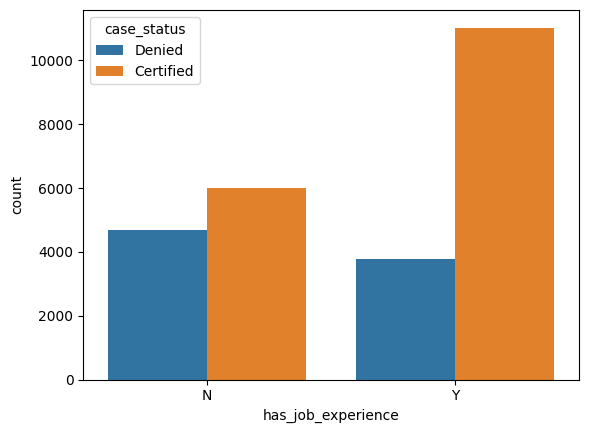

In [ ]:
sns.countplot(data=data, x='has_job_experience', hue='case_status');

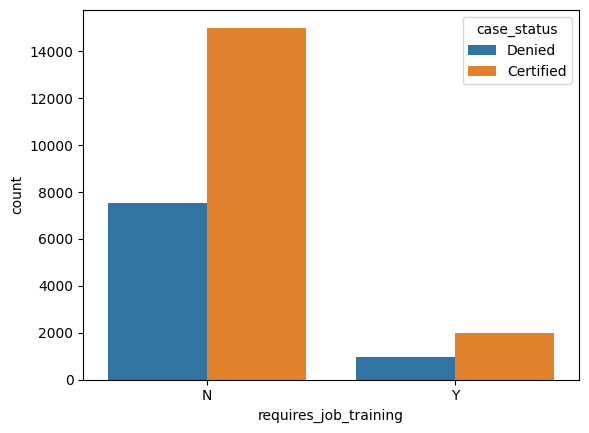

In [ ]:
sns.countplot(data=data, x='requires_job_training', hue='case_status');

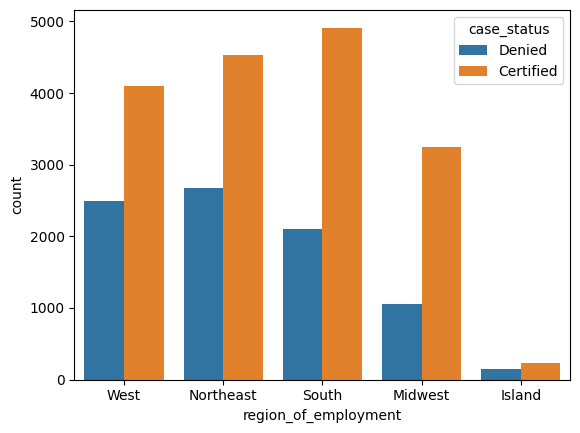

In [ ]:
sns.countplot(data=data, x='region_of_employment', hue='case_status');

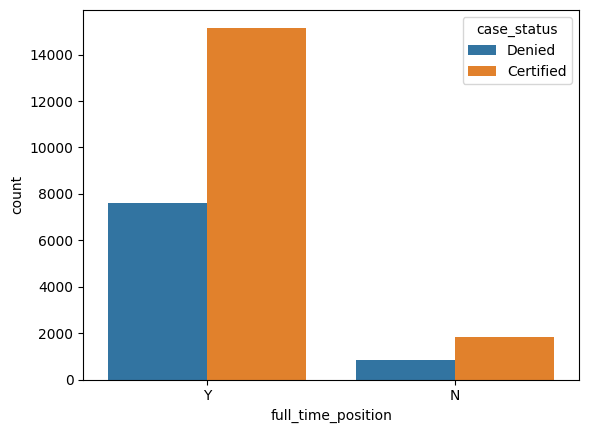

In [ ]:
sns.countplot(data=data, x='full_time_position', hue='case_status');

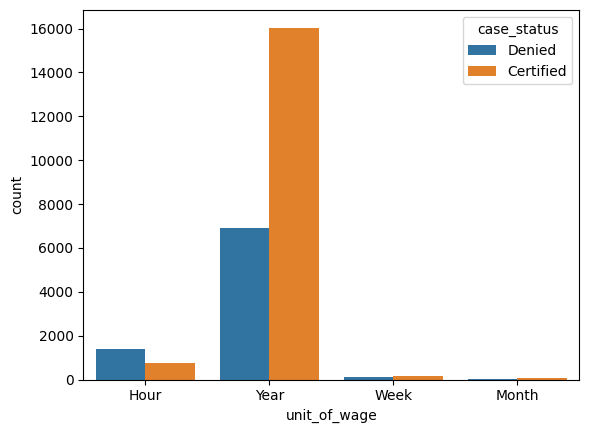

In [ ]:
sns.countplot(data=data, x='unit_of_wage', hue='case_status');

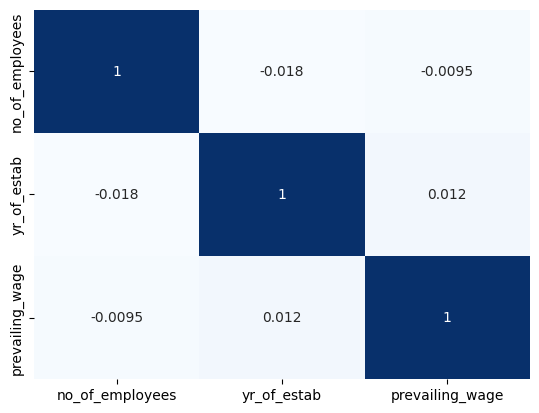

In [ ]:
col_heatmap=data.select_dtypes(include=np.number).columns
sns.heatmap(data[col_heatmap].corr(),annot=True,cbar=False,cmap='Blues');

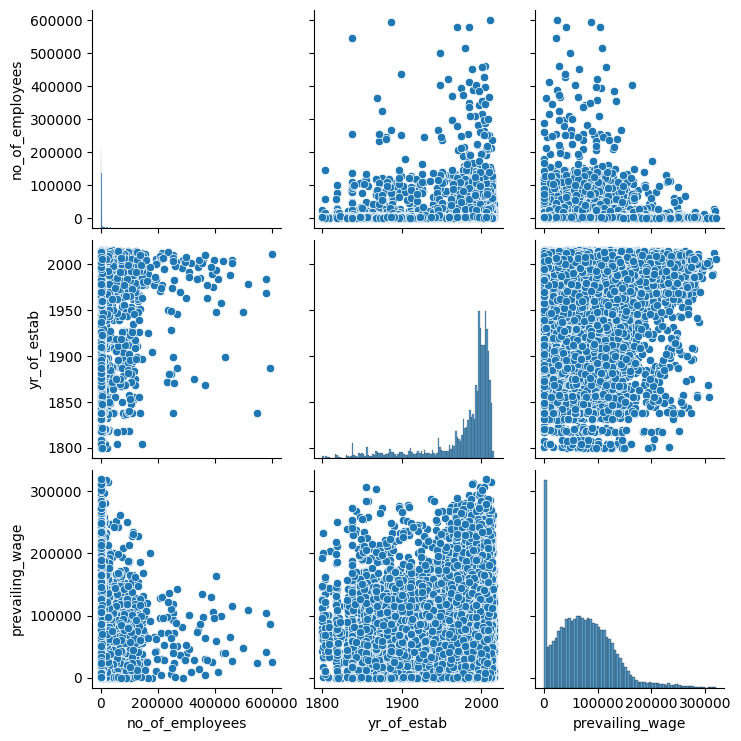

In [ ]:
sns.pairplot(data)

Observation:

1. Masters degree has more chances of certified visa status. Therefore eduaction plays important role in visa status.

2. Asia has maximum no of certified case status with second no of maximum certified case status of Europe. Moreover, Asia has more denied case status as compared to other continents.

3. Employees with work experience has more chances of certified visa status as compared to employees with no work experience.

4. Maximum employees are on yearly wages with certified case status.

5. Total no of employee present in data set is 25480 and 25% of employees are less than 1022; 50% of employees are less than 2109; 75% of employees count for less than 3504.

6. The first company was established in 1800; 25% of companies are established upto 1976; 50% of companies are established upto 1997 and 75% of companies are established upto 2005. The mean year of established is 1979.

7. 25% of employees have 34015 as prevailing wage; 50% of employees have prevailing wage as 70308 and 75% of employees have prevailing wage as 107735. Mean salary is around 74455.81

8. Total unique case id are 25480 and we can drop this column.

9. The top continent from which 16861 employees belongs to is Asia. Second largest continent from which 3732 employees belongs to is Europe and third largest is North America with 3292 employees and the least 192 employees belongs to is Oceania. In other words, 66.2% belongs to Asia; 14.6% belongs to Europe; 12.9% belongs to North America and 0.8% belongs to Oceania.

10. 10234 employees has bachelor’s degree while 9634 has master’s degree and 2192 has Doctorate degree. In other words, 40.02% has Bachelor’s degree, 37.8% has Master’s degree; 13.4% has high school and 8.6% has Doctorate degree.

11. 14802 employees has job experience while 10678 employees does have job experience and 22525 employees does not require job training while 2955 require job training. In other words, 58.1% has job experience and 41.9% does not have job experience while 88.4% employees does not require job training and 11.6% requires job training.

12. Northeast is the top liked region for foreign workers and out of 25480, 7195 employees intended to work for Northeast region. 7017 employees intended to work in South region and 375 in Island. In other words, 28.2% intended to work for Northeast region; 27.5% intended to work for South region; 25.8% for west region while 1.5% for Island.

13. 22962 employees have yearly salary; 2157 has hourly salary and 272 has weekly salary and 89 has monthly wages. In other words, 90.1% prevailing wage is yearly; 8.5% has hourly prevailing wage and 0.3% as monthly.

14. 22773 employees are working as full time and 2707 employees work as part time. In other words, 89.4% work as full time and 10.6% as part time.

15. 17018 have certified case status and 8462 has denied case status. In other words, 66.8% has certified case status and 33.2% has denied case status.
The year of established histogram shows that is left skewed.

16. Employees belonging to Asia has more Certified case status as compared to Denied case status.

17. Employees with Master’s and Bachelor’s degree has more certified case status as compared to denied case status.

18. The employees with job experience has more certified case status and also employees who do not require job training has more certified case status as compared to denied case status.

19. Northeast, South and west has more certified case status as compared to denied case status.

20. Full time employees has more certified case status as compared to denied case status.

21. Employees with yearly wages has more certified case status as compared to denied case status.

22. As per heatmap, there is no positive relationship between no of employees, year of established and prevailing wage.

23. Prevailing wage has right skewed data and year of established has left skewed.

**Data Preprocessing**

Missing value treatment (if needed)

Feature engineering

Outlier detection and treatment (if needed)

Preparing data for modeling

Any other preprocessing steps (if needed)

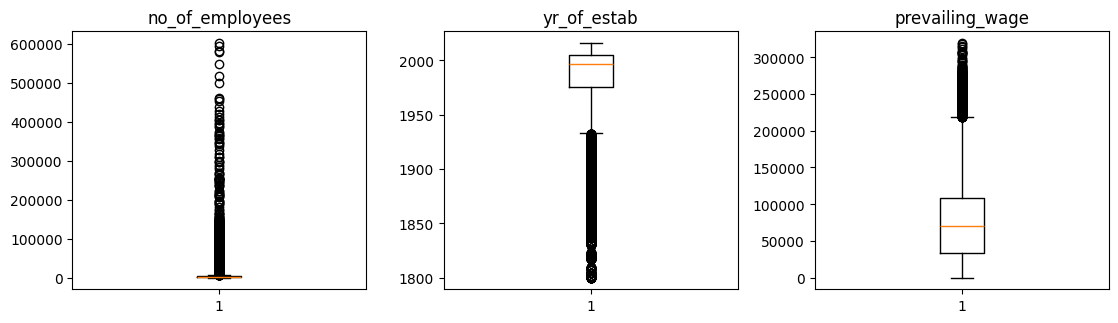

In [ ]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable])
    plt.tight_layout()
    plt.title(variable)

plt.show()

**EDA**

It is a good idea to explore the data once again after manipulating it.

In [ ]:
data.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0
full_time_position,0


**Model Building **

**Building bagging and boosting models**

False Positive: We predicted case status as certified but in actual it is denied. It is loss of opportunities for certified employees if there is a cap on the no of employees issuing visa each year. Actual it is denied which has taken away opportunity for certified case status employees.

False Negative: We predicted case status as denied but in actual it is certified. It is loss for company to get talented employee and also loss for employee to get opportunity to work in US.

Both False positive and false negative are important, therefore, we will consider f1 score.

In [ ]:
X=data.drop('case_status',axis=1)
y=data['case_status'].apply(lambda x:1 if x=='Certified' else 0)

In [ ]:
X=pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 21) (7644, 21)


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
y_train.value_counts(normalize=True)

,proportion
case_status,
1,0.667919
0,0.332081


**Models with hyper parameter tuning**

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664443  0.742605   0.751884  0.747216


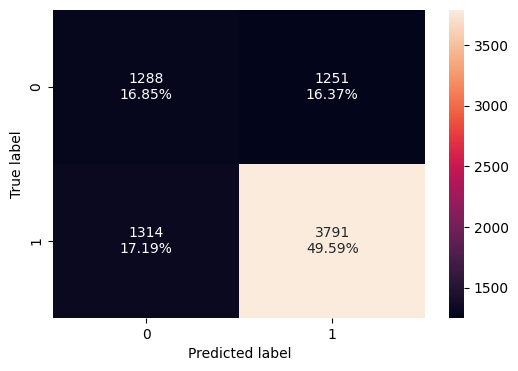

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

Observation:

The f1 score on training set is 1 and f1 score on test set is 0.74 with decision tree as classifier which shows overfitting.

In [ ]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.33,1:0.67},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10, 15],
              'min_impurity_decrease': [0.0001,0.001]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, max_depth=np.int64(4),
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.724041  0.939562   0.727054  0.81976
Testing performance:
    Accuracy  Recall  Precision       F1
0  0.715725  0.9381   0.720584  0.81508


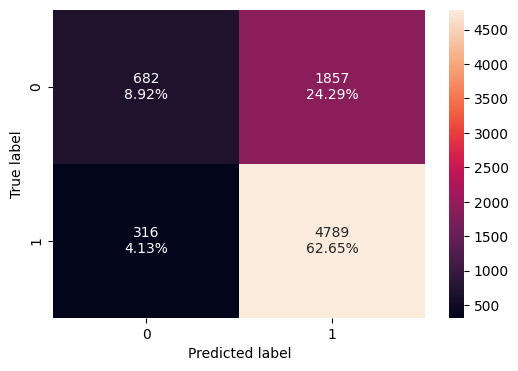

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)


Observation:

The f1 score on training set is 0.81 and f1 score on test set is 0.81 with decision tree hyperparameter tuning .

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.719126  0.830167   0.768032  0.797891


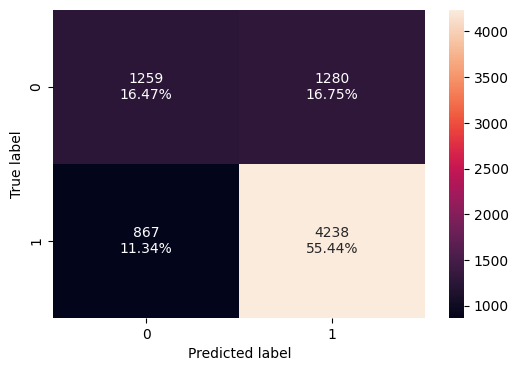

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

Obsevation:

The f1 score on training set is 0.99 and f1 score on test set is 0.79 with random forest as classifier which shows overfitting.

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0:0.33,1:0.67},random_state=1,oob_score=True,bootstrap=True)

parameters = {
                "n_estimators": [50,110,25],
                "min_samples_leaf": np.arange(1, 4),
                "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
                "max_samples": np.arange(0.4, 0.7, 0.1)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.33, 1: 0.67},
                       max_samples=np.float64(0.4),
                       min_samples_leaf=np.int64(3), n_estimators=110,
                       oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.787677  0.969361   0.771409  0.85913
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.724621  0.926934   0.732054  0.818048


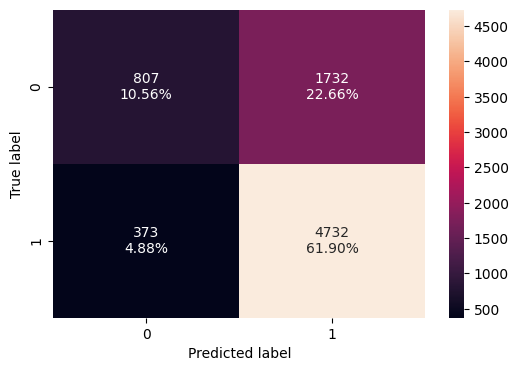

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

Observation:

The f1 score on training set is 0.85 and f1 score on test set is 0.81 with random forest hyperparameter tuning.

   Accuracy    Recall  Precision        F1
0  0.985367  0.986317   0.991729  0.989016
   Accuracy    Recall  Precision        F1
0  0.692177  0.766112     0.7714  0.768747


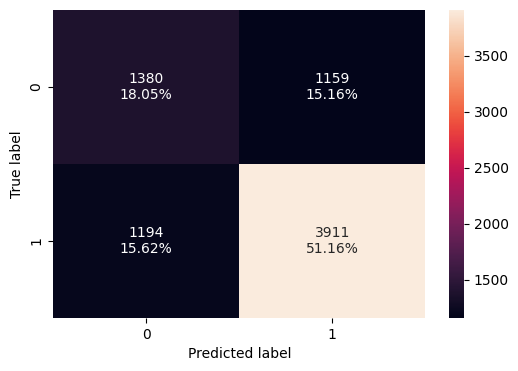

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)


Observation:

The f1 score on training set is 0.98 and f1 score on test set is 0.76 with bagging as classifier which shows overfitting.

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0   0.99871  0.999916   0.998157  0.999036
   Accuracy    Recall  Precision        F1
0  0.725013  0.887365   0.747895  0.811682


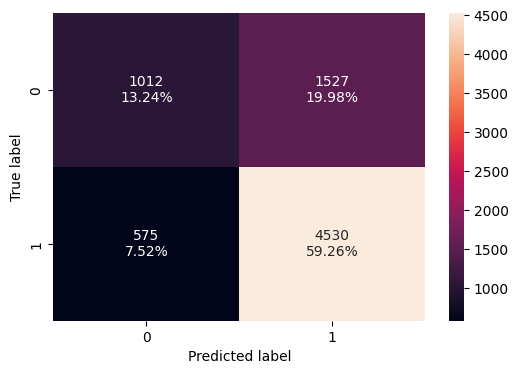

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

Observation:

The f1 score on training set is 0.99 and f1 score on test set is 0.81 with bagging hyperparameter tuning which shows overfitting.

   Accuracy   Recall  Precision        F1
0  0.739684  0.88735   0.762039  0.819934
   Accuracy    Recall  Precision        F1
0  0.735348  0.884819   0.758905  0.817039


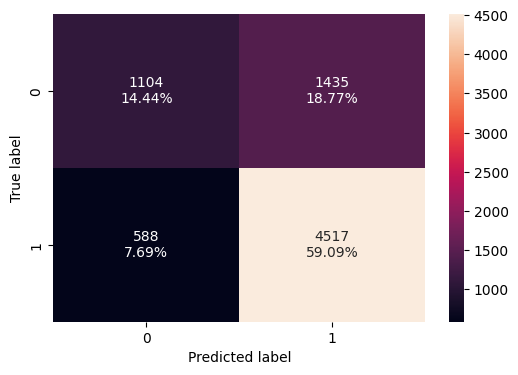

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

Observation:

The f1 score on training set is 0.81 and f1 score on test set is 0.81 with Adaboosting as classifier.

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
              "n_estimators": np.arange(50,110,25),
              "learning_rate": [0.01,0.1,0.05],
              "estimator": [
               DecisionTreeClassifier(max_depth=2, random_state=1),
               DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=np.int64(100),
                   random_state=1)

   Accuracy    Recall  Precision        F1
0   0.75028  0.874423   0.778841  0.823869
   Accuracy    Recall  Precision        F1
0  0.743851  0.872478    0.77313  0.819805


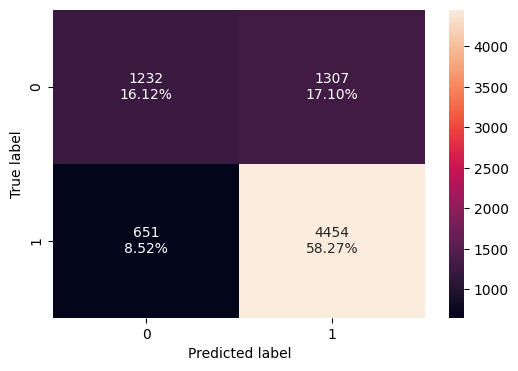

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

Observation:

The f1 score on training set is 0.82 and f1 score on test set is 0.81 with Adaboosting hyperparameter tuning.

Training performance:
    Accuracy    Recall  Precision        F1
0  0.759419  0.882901   0.784106  0.830576
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.744636  0.873262   0.773555  0.82039


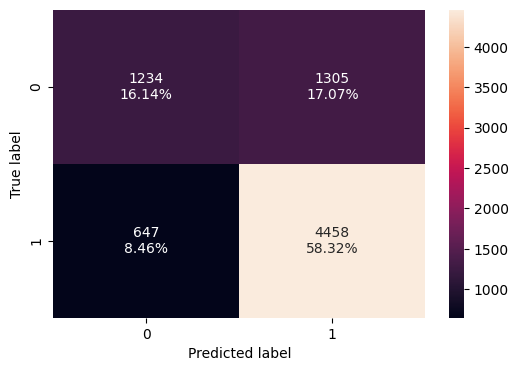

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

Observation:

The f1 score on training set is 0.83 and f1 score on test set is 0.82 with Gradient Boosting Classifier.

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
               "n_estimators": np.arange(50,110,25),
               "learning_rate": [0.01,0.1,0.05],
               "subsample":[0.7,0.9],
               "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=np.int64(50), random_state=1,
                           subsample=0.7)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.742319  0.91035    0.75454  0.825154
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733647  0.909305   0.746903  0.820141


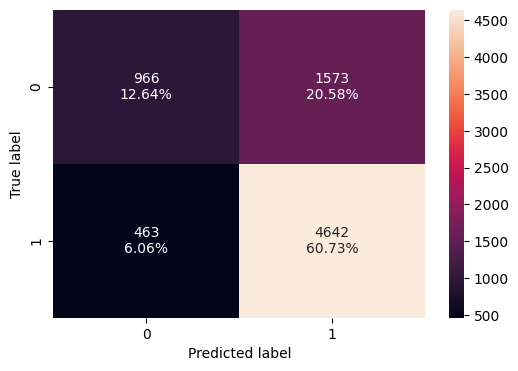

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

Observation:

The f1 score on training set is 0.82 and f1 score on test set is 0.82 with Gradient Boosting hyperparameter tuning.

Training performance:
    Accuracy    Recall  Precision        F1
0  0.843575  0.931084   0.849246  0.888284
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.728545  0.855044   0.765789  0.807959


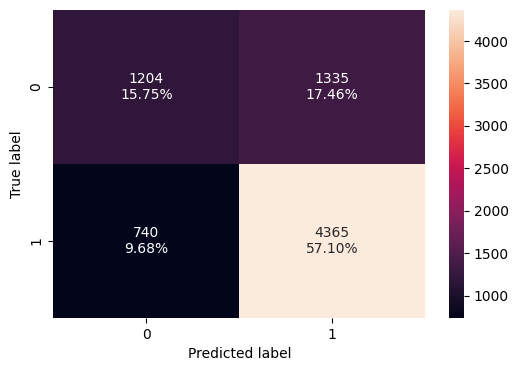

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

Observation:

The f1 score on training set is 0.88 and f1 score on test set is 0.80 with XGB Classifier.

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(50), n_jobs=None, num_parallel_tree=None,
              random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision       F1
0   0.76183  0.887602   0.784247  0.83273
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745683  0.877963   0.772359  0.821782


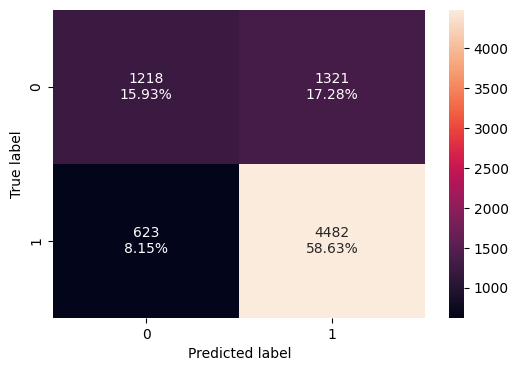

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

Observation:

The f1 score on training set is 0.83 and f1 score on test set is 0.82 with XGB Classifier hyperparameter tuning.

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.33,
                                                                     1: 0.67},
                                                       max_samples=np.float64(0.4),
                                                       min_samples_leaf=np.int64(3),
                                                       n_estimators=110,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.7,
                                                           n_estimators=np.int64(...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=np.int64(50),
                                                 n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

Training performance:
    Accuracy    Recall  Precision        F1
0   0.77181  0.897087   0.789816  0.840041
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.746337  0.87855   0.772743  0.822257


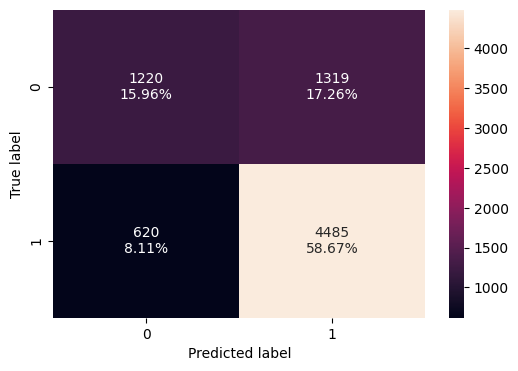

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

Observation:

The f1 score on training set is 0.84 and on test set is 0.82.

**Model Performance Comparison and Conclusions**

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.724041,0.999944,0.787677,0.985367,0.998710,0.739684,0.750280,0.759419,0.742319,0.843575,0.761830,0.771810
Recall,1.0,0.939562,0.999916,0.969361,0.986317,0.999916,0.887350,0.874423,0.882901,0.910350,0.931084,0.887602,0.897087
Precision,1.0,0.727054,1.000000,0.771409,0.991729,0.998157,0.762039,0.778841,0.784106,0.754540,0.849246,0.784247,0.789816
F1,1.0,0.819760,0.999958,0.859130,0.989016,0.999036,0.819934,0.823869,0.830576,0.825154,0.888284,0.832730,0.840041


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664443,0.715725,0.719126,0.724621,0.692177,0.725013,0.735348,0.743851,0.744636,0.733647,0.728545,0.745683,0.746337
Recall,0.742605,0.938100,0.830167,0.926934,0.766112,0.887365,0.884819,0.872478,0.873262,0.909305,0.855044,0.877963,0.878550
Precision,0.751884,0.720584,0.768032,0.732054,0.771400,0.747895,0.758905,0.773130,0.773555,0.746903,0.765789,0.772359,0.772743
F1,0.747216,0.815080,0.797891,0.818048,0.768747,0.811682,0.817039,0.819805,0.820390,0.820141,0.807959,0.821782,0.822257


Observation:

We will select Gradient boosting classifier as final model as the train and test performance have best results with GB classifier.

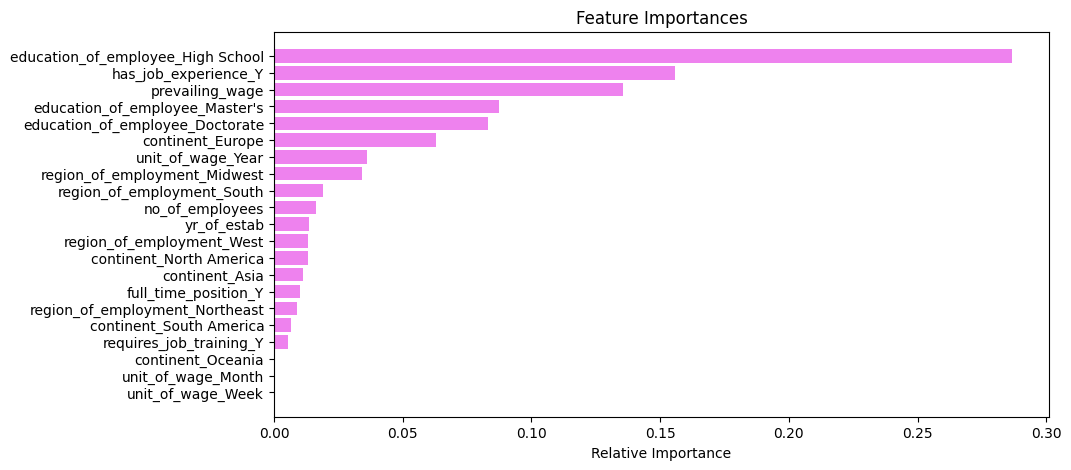

In [ ]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Observation:

The most important columns are employees with education as High school , has a job experience and prevailing wage.

**Actionable Insights and Recommendations**

1. 50% of employees have prevailing wage as 70308 and mean salary is around 74455.81
2. 40.02% has Bachelor’s degree, 37.8% has Master’s degree; 13.4% has high school and 8.6% has Doctorate degree.
3. Employees with Master’s and Bachelor’s degree has more certified case status as compared to denied case status.
4. 58.1% has job experience and 41.9% does not have job experience.
5. 88.4% employees does not require job training and 11.6% requires job training.
6. Employees who do not require job training has more certified case status as compared to denied case status.
7. Northeast is the top liked region for foreign workers. 28.2% intended to work for Northeast region; 27.5% intended to work for South region; 25.8% for west region while 1.5% for Island.
8. Northeast, South and west has more certified case status as compared to denied case status.
9. 90.1% prevailing wage is yearly; 8.5% has hourly prevailing wage and 0.3% as monthly.
10. Employees with yearly wages has more certified case status as compared to denied case status.
11. 89.4% work as full time and 10.6% as part time. Full time employees has more certified case status as compared to denied case status.
12. Employees belonging to Asia has more Certified case status as compared to Denied case status. Asia has maximum no of certified case status with second no of maximum certified case status of Europe.
13. The top continent from which employees belongs to is Asia and Europe.
14. Employees with work experience has more chances of certified visa status as compared to employees with no work experience.
15. The most important columns are employees with education as High school , has a job experience and prevailing wage.
16. Therefore, company should focus on employees with education as Bachelor’s and Master’s; who does not require job training and has job experience in order to have more visa approvals.
17. Moreover, employees intended to work full time for Northeast, South or west region and belongs to Asia or Europe should be another focus for visa approvals.
18. Also, another focus should be on employees who have yearly as prevailing wage and mean salary of approximately 75000 so that more visa got approved.
